# MSc in Data Science 
# Machine Learning 
# Academic Year: 2017-2018

## Decision Tree for white wines dataset 

In [1]:
import sys
import re
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import graphviz 
import pydot
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

We are going to treat the problem as a classification problem and we are going to build a decision tree to learn a classification model that predicts wine quality based on the available features. For this, we firstly load the white wine dataset, assign the eleven features to X and the target value to Y and then we split the data into a training set and a test set, so as to train the decision tree with the first set and test the model with the second set. We print the sets to get a glimpse of what they contain.

In [2]:
balance_data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ";", header = 0)
X = balance_data.values[:,0:11]
Y = balance_data.values[:,11:12]
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 50)
print (X_train)
print (X_test)

[[  7.6     0.31    0.29  ...,   3.04    0.35    9.4  ]
 [  9.8     0.36    0.46  ...,   2.89    0.3    10.1  ]
 [  6.1     0.32    0.37  ...,   3.49    0.44   10.5  ]
 ..., 
 [  6.5     0.425   0.4   ...,   3.23    0.57    9.   ]
 [  9.      0.55    0.3   ...,   2.94    0.36   11.8  ]
 [  7.1     0.49    0.22  ...,   3.24    0.37   11.   ]]
[[  6.4    0.22   0.38 ...,   2.97   0.3   11.  ]
 [  7.5    0.23   0.68 ...,   2.99   0.38   8.8 ]
 [  6.8    0.35   0.44 ...,   3.14   0.44   9.5 ]
 ..., 
 [  5.1    0.26   0.34 ...,   3.23   0.41   9.2 ]
 [  7.     0.22   0.26 ...,   3.1    0.38  11.7 ]
 [  7.     0.29   0.37 ...,   3.17   0.44  10.8 ]]


In [3]:
print (Y_train)
print (Y_test)

[[ 5.]
 [ 4.]
 [ 4.]
 ..., 
 [ 5.]
 [ 5.]
 [ 3.]]
[[ 7.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 8.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 7.]
 [ 6.]
 [ 8.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 8.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 7.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 5.]
 [ 6.]
 [ 8.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 8.]
 [ 6.]
 [ 7.]
 [ 6.]
 [ 7.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.

Because of the observation that the values of the features of the dataset have a large discrepancy, we decide to scale them before "constructing" the decision tree. 

In [4]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler_train.fit_transform(X_train)
set_printoptions(precision=3)
X_train = rescaledX_train
print (X_train)

[[ 0.365  0.225  0.236 ...,  0.291  0.151  0.226]
 [ 0.577  0.275  0.374 ...,  0.155  0.093  0.339]
 [ 0.221  0.235  0.301 ...,  0.7    0.256  0.403]
 ..., 
 [ 0.26   0.338  0.325 ...,  0.464  0.407  0.161]
 [ 0.5    0.461  0.244 ...,  0.2    0.163  0.613]
 [ 0.317  0.402  0.179 ...,  0.473  0.174  0.484]]


In [5]:
scaler_test = MinMaxScaler(feature_range=(0, 1))
rescaledX_test = scaler_test.fit_transform(X_test)
set_printoptions(precision=3)
X_test = rescaledX_test
print (X_test)

[[ 0.364  0.151  0.229 ...,  0.222  0.07   0.508]
 [ 0.564  0.162  0.41  ...,  0.244  0.183  0.136]
 [ 0.436  0.292  0.265 ...,  0.411  0.268  0.254]
 ..., 
 [ 0.127  0.195  0.205 ...,  0.511  0.225  0.203]
 [ 0.473  0.151  0.157 ...,  0.367  0.183  0.627]
 [ 0.473  0.227  0.223 ...,  0.444  0.268  0.475]]


In the next step we are going to apply the DecisionTreeClassifier to the training set, with the "entropy" parameter, which defines the function used to measure the quality of a split, as we are interested in getting a Decision Tree that uses Information Gain as a split function. Then we fit the training data and plot the Decicion Tree. As we can observe the root node, with the most information gain, tells us that the biggest factor in determining the quality of a white wine is "alcohol". The second feature with the highest information gain is feature [5], the "free sulfur dioxide". The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our categories (3 to 9).

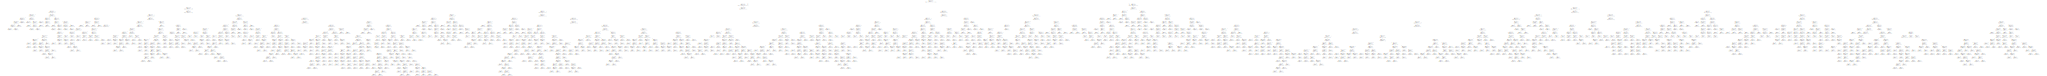

In [7]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, Y_train)

dot_data = export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("white_wine") 
graph

So, now we are have created our model and we want to predict first the train set and then the test set, so as to show that the tree has learned perfectly the training set and has 100% accuracy, but the outcome on the test set is not so good, with only 36,12% accuracy. (by accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points). This is the issue of over fitting a tree. The model will be really good on the training data but it will fail to validate on the test data. Growing the tree beyond a certain level of complexity leads to overfitting.

In [8]:
Y_pred_train = dtc.predict(X_train)
print Y_pred_train

[ 5.  4.  4. ...,  5.  5.  3.]


In [9]:
print "Accuracy for training data is", accuracy_score(Y_train, Y_pred_train)*100

Accuracy for training data is 100.0


In [10]:
Y_pred_test = dtc.predict(X_test)
print Y_pred_test

[ 7.  6.  6.  4.  5.  5.  6.  6.  7.  7.  6.  5.  6.  7.  7.  6.  5.  5.
  5.  3.  5.  7.  6.  4.  7.  6.  7.  6.  5.  5.  5.  5.  5.  5.  6.  5.
  6.  5.  6.  5.  5.  5.  7.  4.  6.  5.  6.  6.  6.  5.  6.  7.  6.  6.
  4.  6.  6.  7.  6.  8.  5.  5.  5.  8.  6.  6.  5.  5.  5.  6.  7.  6.
  5.  8.  8.  5.  8.  6.  5.  7.  6.  6.  7.  7.  5.  5.  8.  7.  6.  5.
  7.  7.  5.  6.  6.  5.  6.  6.  6.  6.  6.  5.  6.  7.  6.  6.  5.  5.
  6.  8.  6.  6.  6.  6.  6.  6.  5.  6.  6.  6.  6.  5.  8.  6.  6.  6.
  7.  7.  7.  5.  6.  4.  6.  6.  6.  6.  8.  6.  5.  5.  5.  6.  6.  5.
  5.  5.  7.  6.  6.  5.  6.  4.  8.  6.  6.  4.  6.  5.  6.  6.  5.  6.
  7.  4.  5.  5.  6.  4.  6.  4.  5.  6.  6.  7.  5.  7.  6.  6.  8.  3.
  5.  5.  7.  5.  6.  6.  6.  6.  5.  7.  6.  6.  7.  7.  5.  6.  6.  5.
  5.  6.  6.  6.  4.  6.  8.  5.  6.  5.  6.  4.  8.  7.  6.  6.  6.  7.
  4.  3.  6.  7.  6.  4.  6.  6.  5.  8.  7.  4.  6.  6.  5.  5.  6.  7.
  5.  6.  6.  5.  7.  6.  6.  7.  7.  8.  5.  5.  5

In [11]:
print "Accuracy for test data is", accuracy_score(Y_test, Y_pred_test)*100

Accuracy for test data is 36.1224489796


To avoid the problem of overfitting, we are going to have a pruned Decision Tree, which means that we are going to trimm it to a level that the complexity is decreased and the Tree does not over fit. So, we set some parameters that will not allow the tree to fully grow, such as the maximum depth of it and the min_samples_leaf parameter, which means "don't consider a split that leaves less than min_samples_leaf in the leaf" and "remake" the tree.

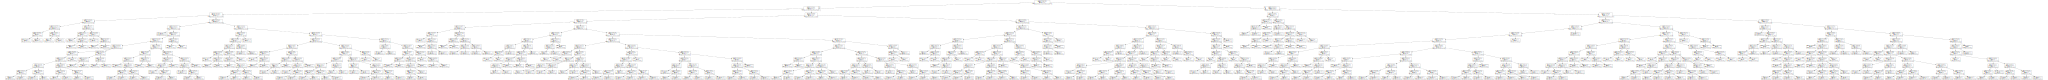

In [13]:
dtc_pruned = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=5, max_depth=12)
dtc_pruned.fit(X_train, Y_train)

dot_data = export_graphviz(dtc_pruned, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("red_wine") 
graph

The same procedure as before is being followed to measure the accuracy of the model on the training set and the accuracy on the test set. As we can see, the accuracy on the training set has decreased to 74,75% and the accuracy on the test set has increased to 40,61%. It might not be the best model for the data, but as we can see by avoiding overfitting in the Decision Tree the model became a little bit more efficient.

In [14]:
Y_pred_train = dtc_pruned.predict(X_train)
print Y_pred_train

[ 5.  4.  4. ...,  5.  5.  8.]


In [15]:
print "Accuracy for training data is", accuracy_score(Y_train, Y_pred_train)*100

Accuracy for training data is 74.7575293517


In [16]:
Y_pred_test = dtc_pruned.predict(X_test)
print Y_pred_test

[ 8.  5.  5.  6.  5.  5.  5.  5.  7.  8.  6.  5.  6.  8.  7.  5.  6.  5.
  5.  8.  5.  8.  6.  6.  8.  5.  7.  6.  5.  5.  5.  5.  5.  5.  5.  4.
  6.  6.  6.  5.  5.  5.  5.  5.  6.  5.  5.  5.  6.  5.  6.  7.  6.  6.
  5.  6.  8.  7.  6.  7.  5.  5.  5.  8.  5.  8.  5.  5.  6.  6.  7.  5.
  5.  6.  7.  5.  8.  5.  5.  8.  5.  6.  8.  7.  5.  5.  8.  6.  6.  5.
  8.  8.  5.  4.  8.  5.  6.  8.  6.  6.  6.  5.  6.  5.  4.  8.  5.  5.
  6.  8.  6.  6.  7.  6.  5.  5.  5.  6.  6.  5.  5.  6.  5.  4.  6.  6.
  8.  7.  7.  5.  6.  5.  6.  6.  8.  4.  6.  6.  5.  5.  6.  6.  5.  5.
  6.  6.  7.  4.  5.  6.  6.  8.  7.  6.  5.  5.  5.  5.  4.  5.  5.  6.
  6.  5.  5.  6.  6.  6.  6.  5.  7.  6.  5.  7.  5.  6.  8.  5.  7.  8.
  6.  5.  7.  5.  6.  6.  6.  7.  5.  7.  6.  4.  6.  7.  5.  6.  6.  5.
  4.  6.  6.  5.  5.  6.  6.  5.  5.  5.  6.  5.  6.  7.  6.  5.  6.  8.
  6.  5.  5.  7.  8.  5.  4.  6.  5.  7.  6.  5.  5.  6.  5.  5.  6.  8.
  6.  6.  5.  5.  5.  6.  5.  5.  7.  8.  5.  5.  7

In [17]:
print "Accuracy for training data is", accuracy_score(Y_test, Y_pred_test)*100

Accuracy for training data is 40.612244898
